In [22]:
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from math import log, log10

import time
from datetime import datetime



In [2]:

iris_data = datasets.load_iris()
print(iris_data.data.shape)
print(iris_data)
print(iris_data.feature_names)


(150, 4)
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.

In [3]:

iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
display(iris_df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


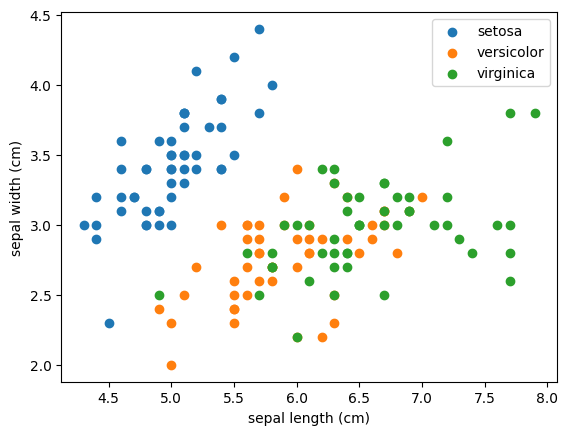

In [4]:

for targ in np.unique(iris_data.target):
    plt.scatter(iris_df[iris_data.feature_names[0]][iris_df['target'] == targ],
                iris_df[iris_data.feature_names[1]][iris_df['target'] == targ],
                label=iris_data.target_names[targ])
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.legend()
plt.show()


In [5]:
# k-Nearest neighbors

np.random.seed(datetime.now().microsecond)
indices = np.random.permutation(len(iris_df))

train_size = int(len(iris_df) * 0.8)
train_df = iris_df.iloc[indices[:train_size]]
test_df = iris_df.iloc[indices[train_size:]]

knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(train_df[iris_data.feature_names], train_df['target'])



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [6]:

res = knn.predict(test_df[iris_data.feature_names])

res_df = pd.DataFrame({'Predicted': res, 'Actual': test_df['target']})
display(res_df)


,Predicted,Actual
42,0,0
141,2,2
89,1,1
3,0,0
50,1,1
48,0,0
47,0,0
145,2,2
40,0,0
20,0,0


In [7]:

mask = (res_df['Predicted'] == res_df['Actual'])
correct = mask.sum()
total = len(res_df)

print(f'Accuracy: {correct / total * 100:.2f}%')


Accuracy: 100.00%


In [8]:

diabetes_data = datasets.load_diabetes()



In [9]:
diabetes_df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['target'] = diabetes_data.target
display(diabetes_df)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [10]:
indices = np.random.permutation(len(diabetes_df))

train_size = int(len(diabetes_df) * 0.8)
train_df = diabetes_df.iloc[indices[:train_size]]
test_df = diabetes_df.iloc[indices[train_size:]]


In [11]:

regr = sklearn.linear_model.LinearRegression()
regr.fit(train_df[diabetes_data.feature_names], train_df['target'])
print(regr.coef_)


[ -37.44340454 -257.19687932  519.54238609  338.79468479 -920.34438096
  582.65728833  135.90949299  201.30675772  720.68236404   91.94730815]


In [12]:

mse = np.mean((regr.predict(test_df[diabetes_data.feature_names]) - test_df['target']) ** 2)
print(mse)

score = regr.score(test_df[diabetes_data.feature_names], test_df['target'])
print(score)


2796.683267382566
0.5317040319774486


[[0.5]
 [1. ]] [0.5, 1] [[0]
 [2]]
[[0.6074406 ]
 [0.79012295]]
result: [[0]
 [2]] [-1.1625596   4.31142288]
[[0.47987791]
 [0.95793153]]
result: [[0]
 [2]] [-1.90804536e-03  2.08990753e+00]
[[0.59530606]
 [1.11880302]]
result: [[0]
 [2]] [-0.06858598  1.8416448 ]
[[0.53134908]
 [0.94228694]]
result: [[0]
 [2]] [-0.14650781  2.28695011]
[[0.60539231]
 [1.06765683]]
result: [[0]
 [2]] [-0.15481157  2.00845202]
[[0.38026094]
 [0.83131725]]
result: [[0]
 [2]] [0.0784773  2.29549542]


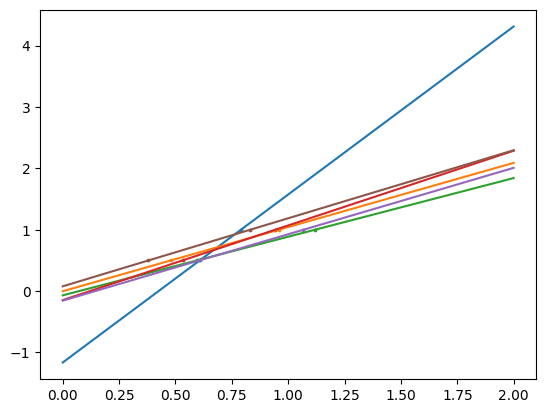

In [13]:
# Shrinkage

X = np.c_[.5, 1].T 
y = [.5, 1]
test = np.c_[0, 2].T 

print(X, y, test)

plt.figure()

np.random.seed(datetime.now().microsecond)
for _ in range(6):
    # normal distribution with stddev 0.1
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    print(this_X)
    regr.fit(this_X, y)
    print("result:", test, regr.predict(test))

    # plot according to test points
    plt.plot(test, regr.predict(test))

    # plot the points we used to fit the model
    plt.scatter(this_X, y, s=3)


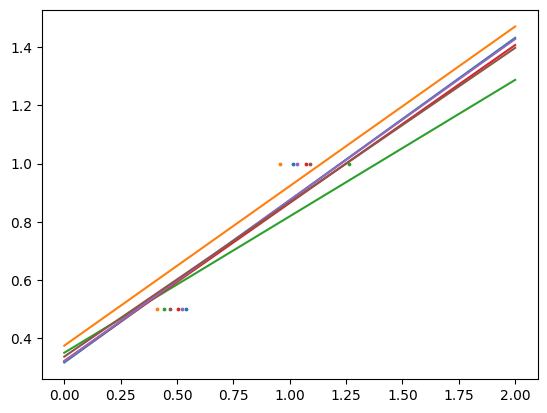

In [14]:

# alpha = extra L2 norm penalty for large coefficients
regr = sklearn.linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(datetime.now().microsecond)
for _ in range(6):
    # normal distribution with stddev 0.1
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    # print(this_X)
    regr.fit(this_X, y)
    # print("result:", test, regr.predict(test))

    # plot according to test points
    plt.plot(test, regr.predict(test))

    # plot the points we used to fit the model
    plt.scatter(this_X, y, s=3)

In [15]:
alphas = np.logspace(-4, -1, 6)



scores = [regr.set_params(alpha=alpha)
            .fit(train_df[diabetes_data.feature_names], train_df['target'])
            .score(test_df[diabetes_data.feature_names], test_df['target']) for alpha in alphas]

print(scores)


[0.5317806850928279, 0.5319878565409863, 0.5325732743385518, 0.5332852879373704, 0.5325308182114463, 0.5266768910583634]


In [23]:
regr = sklearn.linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
            .fit(train_df[diabetes_data.feature_names], train_df['target'])
            .score(test_df[diabetes_data.feature_names], test_df['target']) for alpha in alphas]


best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(train_df[diabetes_data.feature_names], train_df['target'])

print(regr.coef_)
print(best_alpha)
print(log10( best_alpha))
print([log10(alpha) for alpha in alphas])


[ -15.46569838 -235.66115278  527.78742485  317.38010528 -159.23904243
    0.         -202.95187371   75.01626457  445.26201875   84.57476042]
0.025118864315095794
-1.6
[-4.0, -3.4, -2.8, -2.2, -1.6, -1.0]


In [24]:

log_regr = sklearn.linear_model.LogisticRegression(C=1e5)

np.random.seed(datetime.now().microsecond)
indices = np.random.permutation(len(iris_df))

train_size = int(len(iris_df) * 0.8)
iris_train = iris_df.iloc[indices[:train_size]]
iris_test = iris_df.iloc[indices[train_size:]]

log_regr.fit(iris_train[iris_data.feature_names], iris_train['target'])



,penalty,'l2'
,dual,False
,tol,0.0001
,C,100000.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:

iris_predict = []

for i in range(len(iris_test)):
    iris_predict.append((np.float64(log_regr.predict([iris_test.iloc[i][iris_data.feature_names]]).item()), iris_test.iloc[i]['target']))

df = pd.DataFrame(iris_predict, columns=['Predicted', 'Actual'])
display(df)



/home/qiaod/aiprojects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/qiaod/aiprojects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/qiaod/aiprojects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/qiaod/aiprojects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/qiaod/aiprojects/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but Logist

,Predicted,Actual
0,1,2.0
1,0,0.0
2,0,0.0
3,1,1.0
4,0,0.0
5,2,2.0
6,1,1.0
7,1,1.0
8,1,1.0
9,2,2.0
